In [123]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import datetime

In [70]:
my_id = {"cuni":"65172859"}

In [71]:
data = requests.post('https://ies-midterm.soulution.rocks/login',json=my_id)
soup = BeautifulSoup(data.text)
soup

<html><body><p>{"data": {"personal_code": "9a42649a", "dataset_ids": ["f45ec2e9fc", "ef0bccd7cc", "0a42bff0a1", "5df3513c79"]}, "message": "Hello, \u010cern\u00fd Jakub, Bc! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook."}</p></body></html>

In [93]:
my_response = eval(soup.find("p").text)
my_response

{'data': {'personal_code': '9a42649a',
  'dataset_ids': ['f45ec2e9fc', 'ef0bccd7cc', '0a42bff0a1', '5df3513c79']},
 'message': 'Hello, Černý Jakub, Bc! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [96]:
my_response['data']['personal_code']

'9a42649a'

In [98]:
my_response['data']['dataset_ids']

['f45ec2e9fc', 'ef0bccd7cc', '0a42bff0a1', '5df3513c79']

In [99]:
my_code = my_response['data']['personal_code']

data_codes = my_response['data']['dataset_ids']

In [74]:
raw_data=[]
for code in data_codes:
    raw_data.append(requests.get(f'https://ies-midterm.soulution.rocks/data/{code}').text)

In [186]:
soup_1 = BeautifulSoup(raw_data[0])
data_1 = eval(soup_1.find("p").text)["data"]
data_1 

{'company': 'AAL',
 'data': [{'Date': '2019-01-02',
   'Open': '31.459999084472656',
   'High': '32.650001525878906',
   'Low': '31.049999237060547',
   'Close': '32.47999954223633',
   'Adj.Close': '31.963159561157227',
   'Volume': '5229500'},
  {'Date': '2019-01-03',
   'Open': '31.690000534057617',
   'High': '31.850000381469727',
   'Low': '28.809999465942383',
   'Close': '30.059999465942383',
   'Adj.Close': '29.5816650390625',
   'Volume': '16822000'},
  {'Date': '2019-01-04',
   'Open': '30.440000534057617',
   'High': '32.09000015258789',
   'Low': '30.399999618530273',
   'Close': '32.040000915527344',
   'Adj.Close': '31.530160903930664',
   'Volume': '9369600'},
  {'Date': '2019-01-07',
   'Open': '31.989999771118164',
   'High': '33.47999954223633',
   'Low': '31.239999771118164',
   'Close': '32.95000076293945',
   'Adj.Close': '32.42567825317383',
   'Volume': '8010700'},
  {'Date': '2019-01-08',
   'Open': '33.36000061035156',
   'High': '33.650001525878906',
   'Low':

In [191]:
df_1 = pd.DataFrame(data_1["data"])
df_1["Firm"]=data_1["company"]
df_1

,Date,Open,High,Low,Close,Adj.Close,Volume,Firm
0,2019-01-02,31.459999084472656,32.650001525878906,31.049999237060547,32.47999954223633,31.963159561157227,5229500,AAL
1,2019-01-03,31.690000534057617,31.850000381469727,28.809999465942383,30.059999465942383,29.5816650390625,16822000,AAL
2,2019-01-04,30.440000534057617,32.09000015258789,30.399999618530273,32.040000915527344,31.530160903930664,9369600,AAL
3,2019-01-07,31.989999771118164,33.47999954223633,31.239999771118164,32.95000076293945,32.42567825317383,8010700,AAL
4,2019-01-08,33.36000061035156,33.650001525878906,32.20000076293945,32.41999816894531,31.904109954833984,7107700,AAL
...,...,...,...,...,...,...,...,...
474,2020-11-17,12.479999542236328,12.8100004196167,12.229999542236328,12.699999809265137,12.699999809265137,61956500,AAL
475,2020-11-18,12.90999984741211,13.359999656677246,12.729999542236328,12.739999771118164,12.739999771118164,99888500,AAL
476,2020-11-19,12.729999542236328,13.039999961853027,12.630000114440918,12.789999961853027,12.789999961853027,58809400,AAL
477,2020-11-20,12.800000190734863,12.90999984741211,12.460000038146973,12.529999732971191,12.529999732971191,58491100,AAL


In [192]:
min_date = pd.to_datetime('2019-01-02')
top_date = pd.to_datetime('2020-11-20')

In [193]:
df_1["Date"] = df_1["Date"].apply(pd.to_datetime)

In [160]:
df_1 = df_1.loc[(df_1["Date"]>=min_date) & (df_1["Date"]<= top_date)]
df_1

,Date,Open,High,Low,Close,Adj.Close,Volume,Firm
0,2019-01-02,31.459999084472656,32.650001525878906,31.049999237060547,32.47999954223633,31.963159561157227,5229500,AAL
1,2019-01-03,31.690000534057617,31.850000381469727,28.809999465942383,30.059999465942383,29.5816650390625,16822000,AAL
2,2019-01-04,30.440000534057617,32.09000015258789,30.399999618530273,32.040000915527344,31.530160903930664,9369600,AAL
3,2019-01-07,31.989999771118164,33.47999954223633,31.239999771118164,32.95000076293945,32.42567825317383,8010700,AAL
4,2019-01-08,33.36000061035156,33.650001525878906,32.20000076293945,32.41999816894531,31.904109954833984,7107700,AAL
...,...,...,...,...,...,...,...,...
473,2020-11-16,12.869999885559082,12.960000038146973,12.40999984741211,12.789999961853027,12.789999961853027,104867800,AAL
474,2020-11-17,12.479999542236328,12.8100004196167,12.229999542236328,12.699999809265137,12.699999809265137,61956500,AAL
475,2020-11-18,12.90999984741211,13.359999656677246,12.729999542236328,12.739999771118164,12.739999771118164,99888500,AAL
476,2020-11-19,12.729999542236328,13.039999961853027,12.630000114440918,12.789999961853027,12.789999961853027,58809400,AAL


In [194]:
df_1 = df_1.set_index("Date")
df_1

,Open,High,Low,Close,Adj.Close,Volume,Firm
Date,,,,,,,
2019-01-02,31.459999084472656,32.650001525878906,31.049999237060547,32.47999954223633,31.963159561157227,5229500,AAL
2019-01-03,31.690000534057617,31.850000381469727,28.809999465942383,30.059999465942383,29.5816650390625,16822000,AAL
2019-01-04,30.440000534057617,32.09000015258789,30.399999618530273,32.040000915527344,31.530160903930664,9369600,AAL
2019-01-07,31.989999771118164,33.47999954223633,31.239999771118164,32.95000076293945,32.42567825317383,8010700,AAL
2019-01-08,33.36000061035156,33.650001525878906,32.20000076293945,32.41999816894531,31.904109954833984,7107700,AAL
...,...,...,...,...,...,...,...
2020-11-17,12.479999542236328,12.8100004196167,12.229999542236328,12.699999809265137,12.699999809265137,61956500,AAL
2020-11-18,12.90999984741211,13.359999656677246,12.729999542236328,12.739999771118164,12.739999771118164,99888500,AAL
2020-11-19,12.729999542236328,13.039999961853027,12.630000114440918,12.789999961853027,12.789999961853027,58809400,AAL


In [195]:
lowest_adj = df_1.groupby("Firm").min("Adj.Close")
highest_adj = df_1.groupby("Firm").max("Adj.Close")
total_of_shares = df_1.groupby("Firm").sum("Volume")

In [177]:
df_1["Date"][0].weekday()

2

In [214]:
df_1[['Open','Close']] = df_1[['Open','Close']].astype(float)

In [218]:
difference=df_1['Open']-df_1['Close']
difference.max()
difference.min()

-3.8699989318847656

In [207]:
aux = []
for i in df_1["Adj.Close"]:
    aux.append(float(i))
adj_close_prices = pd.Series(aux)

<AxesSubplot:>

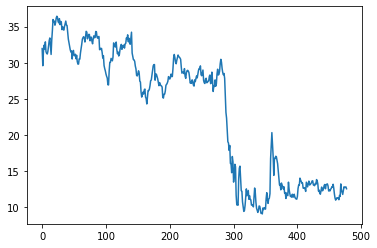

In [208]:
adj_close_prices.plot()